In [135]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np

import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline

pd.options.display.max_columns = 100


In [445]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2017-10-31') & (df['date'] < '2018-01-01')
df1 = df.loc[mask1] 

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [446]:
df1 = df1.groupby(['date']).count()
print(df1.shape)
idx = pd.date_range('11-01-2017', '12-31-2017')
df1.index = pd.DatetimeIndex(df1.index)
df1 = df1.reindex(idx, fill_value=0)
print(df1.shape)

(61, 11)
(61, 11)


In [179]:
df1

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
2017-11-01,134,134,134,134,134,134,134,134,132,132,134
2017-11-02,124,124,124,124,124,124,124,124,122,122,124
2017-11-03,136,136,136,136,136,136,136,136,135,135,136
2017-11-04,107,107,107,107,107,107,107,107,106,106,107
2017-11-05,113,113,113,113,113,113,113,113,111,111,113
2017-11-06,117,117,117,117,117,117,117,117,117,117,117
2017-11-07,137,137,137,137,137,137,137,137,137,137,137
2017-11-08,123,123,123,123,123,123,123,123,122,122,123
2017-11-09,114,114,114,114,114,114,114,114,112,112,114
2017-11-10,144,144,144,144,144,144,144,144,143,143,144


In [447]:
series = df1['Crime Subcategory']

In [140]:
series

2017-11-01    134
2017-11-02    124
2017-11-03    136
2017-11-04    107
2017-11-05    113
2017-11-06    117
2017-11-07    137
2017-11-08    123
2017-11-09    114
2017-11-10    144
2017-11-11    129
2017-11-12    111
2017-11-13    135
2017-11-14    124
2017-11-15    148
2017-11-16    134
2017-11-17    155
2017-11-18    140
2017-11-19    144
2017-11-20    126
2017-11-21    138
2017-11-22    158
2017-11-23     97
2017-11-24    142
2017-11-25    162
2017-11-26    143
2017-11-27    145
2017-11-28    139
2017-11-29    141
2017-11-30    158
             ... 
2017-12-02    138
2017-12-03    134
2017-12-04    132
2017-12-05    111
2017-12-06    119
2017-12-07    119
2017-12-08    154
2017-12-09    133
2017-12-10    129
2017-12-11    130
2017-12-12    126
2017-12-13    144
2017-12-14    122
2017-12-15    150
2017-12-16    164
2017-12-17    138
2017-12-18    130
2017-12-19    154
2017-12-20    138
2017-12-21    143
2017-12-22    154
2017-12-23    150
2017-12-24    108
2017-12-25     82
2017-12-26

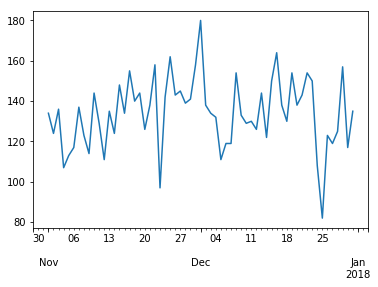

In [141]:
series.plot()
pyplot.show()

In [142]:
X = series.values
X[0:5]

array([134, 124, 136, 107, 113])

In [177]:
train, test = X[0:-14], X[-14:]
train

IndexError: invalid index to scalar variable.

RMSE: 24.171


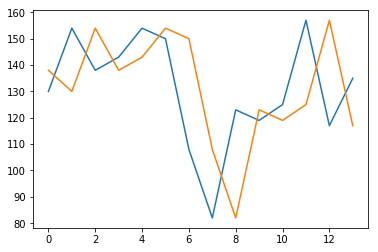

In [145]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [94]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [95]:
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

       0    0
0    0.0  171
1  171.0  151
2  151.0  155
3  155.0  135
4  135.0  130


In [97]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# transform to be stationary
differenced = difference(series, 1)
print(differenced.head())
# invert transform
inverted = list()
for i in range(len(differenced)):
	value = inverse_difference(series, differenced[i], len(series)-i)
	inverted.append(value)
inverted = Series(inverted)
print(inverted.head())

0   -20
1     4
2   -20
3    -5
4    -8
dtype: int64
0    151
1    155
2    135
3    130
4    122
dtype: int64


In [98]:
X = series.values
X = X.reshape(len(X), 1)
print(X)

[[171]
 [151]
 [155]
 [135]
 [130]
 [122]
 [ 95]
 [154]
 [144]
 [127]
 [145]
 [147]
 [131]
 [132]
 [151]
 [169]
 [126]
 [149]
 [130]
 [144]
 [138]
 [159]
 [142]
 [135]
 [131]
 [126]
 [134]
 [146]
 [141]
 [119]
 [147]
 [144]
 [116]
 [134]
 [174]
 [121]
 [140]
 [144]
 [149]
 [153]
 [156]
 [121]
 [139]
 [143]
 [147]
 [159]
 [140]
 [128]
 [145]
 [153]
 [142]
 [145]
 [147]
 [141]
 [144]
 [132]
 [158]
 [142]
 [145]
 [130]
 [141]
 [134]
 [124]
 [136]
 [107]
 [113]
 [117]
 [137]
 [123]
 [114]
 [144]
 [129]
 [111]
 [135]
 [124]
 [148]
 [134]
 [155]
 [140]
 [144]
 [126]
 [138]
 [158]
 [ 97]
 [142]
 [162]
 [143]
 [145]
 [139]
 [141]
 [158]
 [180]
 [138]
 [134]
 [132]
 [111]
 [119]
 [119]
 [154]
 [133]
 [129]
 [130]
 [126]
 [144]
 [122]
 [150]
 [164]
 [138]
 [130]
 [154]
 [138]
 [143]
 [154]
 [150]
 [108]
 [ 82]
 [123]
 [119]
 [125]
 [157]
 [117]
 [135]]


In [99]:
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [100]:
scaled_X

array([[ 0.81632653],
       [ 0.40816327],
       [ 0.48979592],
       [ 0.08163265],
       [-0.02040816],
       [-0.18367347],
       [-0.73469388],
       [ 0.46938776],
       [ 0.26530612],
       [-0.08163265],
       [ 0.28571429],
       [ 0.32653061],
       [ 0.        ],
       [ 0.02040816],
       [ 0.40816327],
       [ 0.7755102 ],
       [-0.10204082],
       [ 0.36734694],
       [-0.02040816],
       [ 0.26530612],
       [ 0.14285714],
       [ 0.57142857],
       [ 0.2244898 ],
       [ 0.08163265],
       [ 0.        ],
       [-0.10204082],
       [ 0.06122449],
       [ 0.30612245],
       [ 0.20408163],
       [-0.24489796],
       [ 0.32653061],
       [ 0.26530612],
       [-0.30612245],
       [ 0.06122449],
       [ 0.87755102],
       [-0.20408163],
       [ 0.18367347],
       [ 0.26530612],
       [ 0.36734694],
       [ 0.44897959],
       [ 0.51020408],
       [-0.20408163],
       [ 0.16326531],
       [ 0.24489796],
       [ 0.32653061],
       [ 0

In [101]:
inverted_X = scaler.inverse_transform(scaled_X)
inverted_X

array([[171.],
       [151.],
       [155.],
       [135.],
       [130.],
       [122.],
       [ 95.],
       [154.],
       [144.],
       [127.],
       [145.],
       [147.],
       [131.],
       [132.],
       [151.],
       [169.],
       [126.],
       [149.],
       [130.],
       [144.],
       [138.],
       [159.],
       [142.],
       [135.],
       [131.],
       [126.],
       [134.],
       [146.],
       [141.],
       [119.],
       [147.],
       [144.],
       [116.],
       [134.],
       [174.],
       [121.],
       [140.],
       [144.],
       [149.],
       [153.],
       [156.],
       [121.],
       [139.],
       [143.],
       [147.],
       [159.],
       [140.],
       [128.],
       [145.],
       [153.],
       [142.],
       [145.],
       [147.],
       [141.],
       [144.],
       [132.],
       [158.],
       [142.],
       [145.],
       [130.],
       [141.],
       [134.],
       [124.],
       [136.],
       [107.],
       [113.],
       [11

In [102]:
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0    171.0
1    151.0
2    155.0
3    135.0
4    130.0
dtype: float64


In [103]:
train

array([171, 151, 155, 135, 130, 122,  95, 154, 144, 127, 145, 147, 131,
       132, 151, 169, 126, 149, 130, 144, 138, 159, 142, 135, 131, 126,
       134, 146, 141, 119, 147, 144, 116, 134, 174, 121, 140, 144, 149,
       153, 156, 121, 139, 143, 147, 159, 140, 128, 145, 153, 142, 145,
       147, 141, 144, 132, 158, 142, 145, 130, 141, 134, 124, 136, 107,
       113, 117, 137, 123, 114, 144, 129, 111, 135, 124, 148, 134, 155,
       140, 144, 126, 138, 158,  97, 142, 162, 143, 145, 139, 141, 158,
       180, 138, 134, 132, 111, 119, 119, 154, 133, 129, 130, 126, 144,
       122, 150, 164, 138, 130, 154])

array([[-26.,  -8.],
       [ -8.,  24.],
       [ 24., -16.],
       [-16.,   5.],
       [  5.,  11.],
       [ 11.,  -4.],
       [ -4., -42.],
       [-42., -26.],
       [-26.,  41.],
       [ 41.,  -4.],
       [ -4.,   6.],
       [  6.,  32.],
       [ 32., -40.],
       [-40.,  18.]])

In [104]:
X

array([[171],
       [151],
       [155],
       [135],
       [130],
       [122],
       [ 95],
       [154],
       [144],
       [127],
       [145],
       [147],
       [131],
       [132],
       [151],
       [169],
       [126],
       [149],
       [130],
       [144],
       [138],
       [159],
       [142],
       [135],
       [131],
       [126],
       [134],
       [146],
       [141],
       [119],
       [147],
       [144],
       [116],
       [134],
       [174],
       [121],
       [140],
       [144],
       [149],
       [153],
       [156],
       [121],
       [139],
       [143],
       [147],
       [159],
       [140],
       [128],
       [145],
       [153],
       [142],
       [145],
       [147],
       [141],
       [144],
       [132],
       [158],
       [142],
       [145],
       [130],
       [141],
       [134],
       [124],
       [136],
       [107],
       [113],
       [117],
       [137],
       [123],
       [114],
       [144],
      

In [71]:
X= train[0:-1]
#X = X.reshape(X.shape[0], 1)

In [73]:
X

array([[160],
       [104],
       [101],
       ...,
       [164],
       [138],
       [130]])

In [ ]:
layer = LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True)

Epoch 1/1
46/46 [==============================] - 2s 41ms/step - loss: 0.1707
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1568
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1473
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1411
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1372
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1347
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1308
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1289
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1269
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1250
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1231
Epoch 1/1
46/46 [==============================] - 0s 3ms/step 

46/46 [==============================] - 0s 4ms/step - loss: 0.0992
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1033
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1060
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0981
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0987
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1049
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1145A: 0s - loss: 0.07
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1/1
46/46 [==============================] - 0s 3m

46/46 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1014
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1016
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1018
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0924
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0921
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1016
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0875
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0926
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0947
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1070
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0921
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1048
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0869
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1042
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0951
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0951
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0950
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0950
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0949
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0949
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0948
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0948
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0947
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0947
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0888
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0888
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0888
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0834
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0882
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0767
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0826
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0830
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0836
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0702
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0701
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0675
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

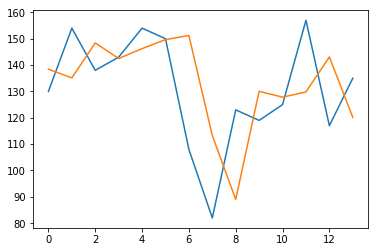

In [201]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()




In [205]:
predictionsf = []

for i in range(len(train_scaled)+1):
	# make one-step forecast
	X = train_scaled[i-1, 0:-1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(train_scaled)+1-i)
	# store forecast
	predictionsf.append(yhat)
	expectedf = raw_values[i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expectedf))


Day=1, Predicted=103.427473, Expected=134.000000
Day=2, Predicted=103.666087, Expected=124.000000
Day=3, Predicted=150.722667, Expected=136.000000
Day=4, Predicted=131.126150, Expected=107.000000
Day=5, Predicted=145.634828, Expected=113.000000
Day=6, Predicted=126.132123, Expected=117.000000
Day=7, Predicted=137.291476, Expected=137.000000
Day=8, Predicted=142.084312, Expected=123.000000
Day=9, Predicted=97.094366, Expected=114.000000
Day=10, Predicted=146.720335, Expected=144.000000
Day=11, Predicted=156.728387, Expected=129.000000
Day=12, Predicted=147.318485, Expected=111.000000
Day=13, Predicted=151.751463, Expected=135.000000
Day=14, Predicted=137.107075, Expected=124.000000
Day=15, Predicted=146.123950, Expected=148.000000
Day=16, Predicted=151.075394, Expected=134.000000
Day=17, Predicted=183.764202, Expected=155.000000
Day=18, Predicted=130.533082, Expected=140.000000
Day=19, Predicted=137.494337, Expected=144.000000
Day=20, Predicted=135.122331, Expected=126.000000
Day=21, Pr

In [208]:
pt = predictionsf + predictions
pt

[103.42747288942337,
 103.66608691215515,
 150.72266660630703,
 131.12615017592907,
 145.63482783734798,
 126.1321232765913,
 137.29147581756115,
 142.084312453866,
 97.09436635673046,
 146.7203345745802,
 156.7283868342638,
 147.31848494708538,
 151.75146305561066,
 137.1070751696825,
 146.12395010888577,
 151.07539381086826,
 183.76420186460018,
 130.533081933856,
 137.4943371862173,
 135.12233106791973,
 117.75154519081116,
 120.78194461762905,
 103.11380372941494,
 175.7536153793335,
 142.82331323623657,
 115.0584019869566,
 135.2660037279129,
 131.81371599435806,
 151.98498213291168,
 129.05511689186096,
 144.82468561828136,
 129.60449808835983,
 134.2649279385805,
 132.7920859605074,
 158.27093024551868,
 145.22631508111954,
 147.43780843913555,
 158.94512756168842,
 142.43494774401188,
 113.44856816530228,
 88.99207180738449,
 129.14015918970108,
 126.40375238656998,
 122.17543296515942,
 163.61450892686844,
 114.15082083642483,
 114.17346777021885,
 138.4243524223566,
 135.1272

In [231]:

ptdf.index = df1.index
ptdf

,0
2017-11-01,103.427473
2017-11-02,103.666087
2017-11-03,150.722667
2017-11-04,131.126150
2017-11-05,145.634828
2017-11-06,126.132123
2017-11-07,137.291476
2017-11-08,142.084312
2017-11-09,97.094366
2017-11-10,146.720335


In [234]:
temp = pd.DataFrame(df1['Crime Subcategory'])
temp

,Crime Subcategory
2017-11-01,134
2017-11-02,124
2017-11-03,136
2017-11-04,107
2017-11-05,113
2017-11-06,117
2017-11-07,137
2017-11-08,123
2017-11-09,114
2017-11-10,144


In [235]:
temp = temp.join(ptdf)
temp

,Crime Subcategory,0
2017-11-01,134,103.427473
2017-11-02,124,103.666087
2017-11-03,136,150.722667
2017-11-04,107,131.126150
2017-11-05,113,145.634828
2017-11-06,117,126.132123
2017-11-07,137,137.291476
2017-11-08,123,142.084312
2017-11-09,114,97.094366
2017-11-10,144,146.720335


Text(0,0.5,'Number of crimes')

<Figure size 432x288 with 0 Axes>

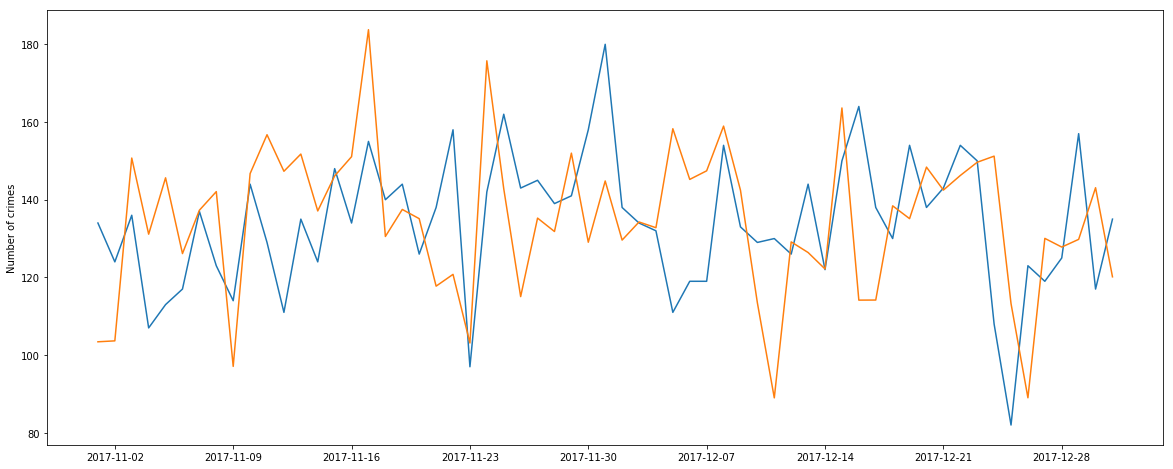

In [238]:
plt.clf()
plt.figure(figsize=[20,8]) 
plt.plot(temp['Crime Subcategory'], label = 'All Crimes')
plt.plot(temp.iloc[:,1], label = 'Predicted Crimes')
plt.ylabel('Number of crimes')


In [239]:
rmse = sqrt(mean_squared_error(temp['Crime Subcategory'], temp.iloc[:,1]))

In [240]:
rmse

22.19764869340679

In [242]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask3 = (df['date'] > '2017-11-30') & (df['date'] < '2018-01-01')
df3 = df.loc[mask3] 
df3 = df3.groupby(['date']).count()
print(df3.shape)
idx = pd.date_range('12-01-2017', '12-31-2017')
df3.index = pd.DatetimeIndex(df3.index)
df3 = df3.reindex(idx, fill_value=0)
print(df3.shape)

(31, 11)
(31, 11)


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [243]:
series3 = df3['Crime Subcategory']

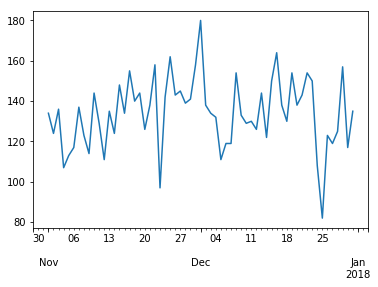

In [244]:
series.plot()
pyplot.show()

Epoch 1/1
16/16 [==============================] - 2s 112ms/step - loss: 0.2578
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2564
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2556
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2550
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2544
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2539
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2534
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2529
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2525
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2521
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2517
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2513
Epoch 1/1
16/16 [==============================] - 0s 3ms/step

16/16 [==============================] - 0s 3ms/step - loss: 0.2368
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2367
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2365
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2364
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2362
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2360
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2359
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2356
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2354
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2353
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2351
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2

16/16 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.2241
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.2242
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.2242
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2241
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2239
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2238
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2236
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2235
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2234
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2

16/16 [==============================] - 0s 3ms/step - loss: 0.2078
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2076
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2074
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2073
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2070
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2068
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2066
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2064
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2060
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2059
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2

16/16 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1894
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1884
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1881
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1881
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1880
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1880
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1879
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1877
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1876
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1875
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.1704
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1699
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1694
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1690
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1688
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1687
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1685
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1682
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1679
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1674
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1728
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.1364
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1293
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1598
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2315
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1632
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1312
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1909
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1746
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1364
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1381
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1735
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.3100
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2281
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1316
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1243
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2270
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2630
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1160
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1254
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1589
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1206
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.1676
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1148
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1077
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1765
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1991
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1064
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1170
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1462
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.2499
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1157
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.3

16/16 [==============================] - 0s 3ms/step - loss: 0.3174
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0874
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1749
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0876
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.2146
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1119
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0902
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1290
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0960
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.0982
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1269
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0905
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0764
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1115
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0978
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0788
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0869
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.3685
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1286
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1820
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1297
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1223
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0766
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.0852
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1184
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1031
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1102
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0785
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0801
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.0867
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0865
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0864
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0864
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0863
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0862
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0860
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0859
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0858
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0857
Epoch 1/1
16/16 [==============================] - 0s 6ms/step - loss: 0.0855
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0854
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0656
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0651
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0940
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0694
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.3764
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1695
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1903
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1158
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.1201
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0711
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1351
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0700
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1985
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0818
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0833
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0972
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0986
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0688
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0940
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0636
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0631
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0625
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0623
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0622
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0620
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0618
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0698
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1104
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0732
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1006
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0602
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.1520
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1091
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0706
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0681
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0595
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1024
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0575
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 1/1
16/16 [==============================] - 0s 2ms/step - loss: 0.0811
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0555
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0995
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0611
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0991
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0812
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0954
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0930
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0972
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1089
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1558
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0872
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0574
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1019
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0459
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1395
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1369
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0996
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0625
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0593
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0657
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0589
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0651
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0829
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1

16/16 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0981
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.1011
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0590
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0603
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0866
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0610
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0750
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0879
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0872
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0876
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0879
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0875
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0869
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0864
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0863
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0860
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0857
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

16/16 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0801
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0795
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 1/1
16/16 [==============================] - 0s 4ms/step - loss: 0.0800
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0799
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0801
Epoch 1/1
16/16 [==============================] - 0s 3ms/step - loss: 0.0

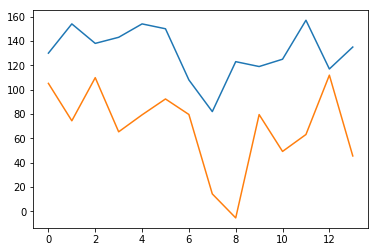

In [246]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series3.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()


In [247]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask4 = (df['date'] > '2017-9-30') & (df['date'] < '2018-01-01')
df4 = df.loc[mask4] 
df4 = df4.groupby(['date']).count()
print(df4.shape)
idx = pd.date_range('10-01-2017', '12-31-2017')
df4.index = pd.DatetimeIndex(df4.index)
df4 = df4.reindex(idx, fill_value=0)
print(df4.shape)

(92, 11)
(92, 11)


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [248]:
series4 = df4['Crime Subcategory']

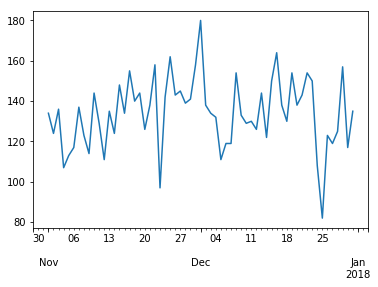

In [249]:
series.plot()
pyplot.show()

Epoch 1/1
77/77 [==============================] - 3s 36ms/step - loss: 0.1563
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1272
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1173
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1129
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1100
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1031
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0998
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0986
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0977
Epoch 1/1
77/77 [==============================] - 0s 3ms/step 

77/77 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0803
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0828
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0856
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0796
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0765
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0779
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0789
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0778
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0762
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0758
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0740
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0738
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0736
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0742
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0743
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0744
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0777
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0781
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0844
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0842
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0843
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0845
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 2ms/step - loss: 0.0855
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0855
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0854
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0853
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0853
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 2ms/step - loss: 0.0801
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0799
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0798
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0797
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 254s 3s/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 1s 7ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0783
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0783
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 0s 5ms/step - loss: 0.0784
Epoch 1/1
77/77 [==============================] - 1s 7ms/step - loss: 0.0783
Epoch 1/1
77/77 [==============================] - 1s 7ms/step - loss: 0.0783
Epoch 1/1
77/77 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 1/1
77/77 [==============================] - 0s 6ms/step - loss: 0.

77/77 [==============================] - 0s 5ms/step - loss: 0.0772
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0770
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0768
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.3631
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0952
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0805
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0747
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0740
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0734
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0906
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1100
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0768
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0774
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0754
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0760
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0794
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0800
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0803
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0825
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0849
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0849
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0850
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0850
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0851
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0851
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0852
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0910
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0908
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0911
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0914
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0911
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0915
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0914
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0920
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0891
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0838
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0911
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0933
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0946
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0893
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0869
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0844
Epoch 1/1
77/77 [==============================] - 0s 3ms/step -

77/77 [==============================] - 0s 2ms/step - loss: 0.0875
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0881
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0869
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0876
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0887
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0878
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0897
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0886
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0905
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0879
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0889
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0913
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0840
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0901
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0895
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0929
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0853
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0984
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1086
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1

77/77 [==============================] - 0s 3ms/step - loss: 0.0856
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0829
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0873
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 11.0503
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1222
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0977
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0978
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0973
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.

77/77 [==============================] - 0s 3ms/step - loss: 0.0947
Epoch 1/1
77/77 [==============================] - 0s 5ms/step - loss: 0.0946
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0943
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0944
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0933
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0934
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0935
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0924
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0923
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0916
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0

77/77 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0959
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.0916
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0894
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1575
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0937
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0896
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0892
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0883
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0941
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1096
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1090
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1083
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1068
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1065
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1062
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1060
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1057
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1054
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1050
Epoch 1/1
77/77 [==============================] - 0s 4ms/step -

77/77 [==============================] - 0s 3ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 5ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1011
Epoch 1/1
77/77 [==============================] - 0s 4ms/step - loss: 0.1010
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1/1
77/77 [==============================] - 0s 5ms/step - loss: 0.1010
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1010
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1

77/77 [==============================] - 0s 2ms/step - loss: 0.1016
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 1/1
77/77 [==============================] - 0s 3ms/step - loss: 0.1018
Epoch 1/1
77/77 [==============================] - 0s 2ms/step - loss: 0.1

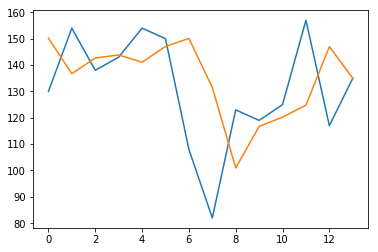

In [250]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series4.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()


In [251]:
X

array([-0.60377358])

## 1 neuron 1500 epochs


In [252]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2017-10-31') & (df['date'] < '2018-01-01')
df1 = df.loc[mask1] 

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [253]:
df1 = df1.groupby(['date']).count()
print(df1.shape)
idx = pd.date_range('11-01-2017', '12-31-2017')
df1.index = pd.DatetimeIndex(df1.index)
df1 = df1.reindex(idx, fill_value=0)
print(df1.shape)

(61, 11)
(61, 11)


Epoch 1/1
46/46 [==============================] - 2s 45ms/step - loss: 0.1743
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1706
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1655
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1637
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1622
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1610
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1599
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1589
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1581
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1573
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1566
Epoch 1/1
46/46 [==============================] - 0s 3ms/step 

46/46 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1181
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1179
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1177
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1175
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1174
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1172
Epoch 1/1
46/46 [==============================] - 0s 5ms/step - loss: 0.1170
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1169
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1166
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1164
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1

46/46 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1084
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1083
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1083
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1082
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1082
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1081
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1081
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1

46/46 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1048
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1047
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1046
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1046
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1046
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1046
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1045
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1

46/46 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1026
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1024
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1

46/46 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1007
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1006
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1006
Epoch 1/1
46/46 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 1/1
46/46 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 1/1
46/46 [==============================] - 0s 2ms/step - loss: 0.1006
Epoch 1/1
46/46 [==============================] - 0s 2ms/step - loss: 0.1005
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1005
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1005
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1

46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0979
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0979
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0979
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0979
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0979
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0972
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0973
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0972
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0972
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0968
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965A: 0s - loss: 0.05
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0965
Epoch 1/1
46/46 [==============================] - 0s 3m

46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0

46/46 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0963
Epoch 1/1
46/46 [==============================] - 0s 4ms/step - loss: 0.0

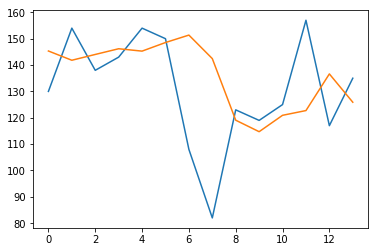

In [254]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
46/46 [==============================] - 2s 54ms/step - loss: 0.1762
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1716
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1643
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1613
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1585
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1560
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1537
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1517
Epoch 1/1
46/46 [==============================] - 0s 3ms/step - loss: 0.1498
Day=1, Predicted=136.926899, Expected=130.000000
Day=2, Predicted=129.057308, Expected=154.000000
Day=3, Predicted=151.852579, Expected=138.000000
Day=4, Predicted=136.859336, Expected=143.000000
Day=5, Predicted=141.35

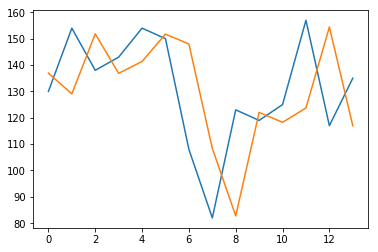

In [258]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 10, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

In [485]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2017-10-31') & (df['date'] < '2017-12-31')
df1 = df.loc[mask1] 

/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [486]:
df1 = df1.groupby(['date']).count()
print(df1.shape)
idx = pd.date_range('11-01-2017', '12-30-2017')
df1.index = pd.DatetimeIndex(df1.index)
df1 = df1.reindex(idx, fill_value=0)
print(df1.shape)

(60, 11)
(60, 11)


In [493]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy


# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 30, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-30], supervised_values[-30:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 30, 1500, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=30)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 30, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-30:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
30/30 [==============================] - 4s 145ms/step - loss: 0.2025
Epoch 1/1
30/30 [==============================] - 0s 132us/step - loss: 0.2020
Epoch 1/1
30/30 [==============================] - 0s 160us/step - loss: 0.2016
Epoch 1/1
30/30 [==============================] - 0s 148us/step - loss: 0.2012
Epoch 1/1
30/30 [==============================] - 0s 181us/step - loss: 0.2007
Epoch 1/1
30/30 [==============================] - 0s 151us/step - loss: 0.2003
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1999
Epoch 1/1
30/30 [==============================] - 0s 188us/step - loss: 0.1995
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1991
Epoch 1/1
30/30 [==============================] - 0s 153us/step - loss: 0.1986
Epoch 1/1
30/30 [==============================] - 0s 126us/step - loss: 0.1982
Epoch 1/1
30/30 [==============================] - 0s 128us/step - loss: 0.1978
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 177us/step - loss: 0.1756
Epoch 1/1
30/30 [==============================] - 0s 139us/step - loss: 0.1755
Epoch 1/1
30/30 [==============================] - 0s 261us/step - loss: 0.1754
Epoch 1/1
30/30 [==============================] - 0s 137us/step - loss: 0.1753
Epoch 1/1
30/30 [==============================] - 0s 137us/step - loss: 0.1752
Epoch 1/1
30/30 [==============================] - 0s 119us/step - loss: 0.1750
Epoch 1/1
30/30 [==============================] - 0s 114us/step - loss: 0.1749
Epoch 1/1
30/30 [==============================] - 0s 163us/step - loss: 0.1748
Epoch 1/1
30/30 [==============================] - 0s 180us/step - loss: 0.1747
Epoch 1/1
30/30 [==============================] - 0s 158us/step - loss: 0.1746
Epoch 1/1
30/30 [==============================] - 0s 160us/step - loss: 0.1745
Epoch 1/1
30/30 [==============================] - 0s 159us/step - loss: 0.1743
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 195us/step - loss: 0.1675
Epoch 1/1
30/30 [==============================] - 0s 222us/step - loss: 0.1674
Epoch 1/1
30/30 [==============================] - 0s 122us/step - loss: 0.1674
Epoch 1/1
30/30 [==============================] - 0s 154us/step - loss: 0.1673
Epoch 1/1
30/30 [==============================] - 0s 162us/step - loss: 0.1673
Epoch 1/1
30/30 [==============================] - 0s 153us/step - loss: 0.1672
Epoch 1/1
30/30 [==============================] - 0s 205us/step - loss: 0.1672
Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1671
Epoch 1/1
30/30 [==============================] - 0s 154us/step - loss: 0.1671
Epoch 1/1
30/30 [==============================] - 0s 124us/step - loss: 0.1670
Epoch 1/1
30/30 [==============================] - 0s 117us/step - loss: 0.1670
Epoch 1/1
30/30 [==============================] - 0s 119us/step - loss: 0.1669
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 128us/step - loss: 0.1634
Epoch 1/1
30/30 [==============================] - 0s 210us/step - loss: 0.1634
Epoch 1/1
30/30 [==============================] - 0s 157us/step - loss: 0.1633
Epoch 1/1
30/30 [==============================] - 0s 155us/step - loss: 0.1633
Epoch 1/1
30/30 [==============================] - 0s 271us/step - loss: 0.1633
Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1633
Epoch 1/1
30/30 [==============================] - 0s 221us/step - loss: 0.1632
Epoch 1/1
30/30 [==============================] - 0s 250us/step - loss: 0.1632
Epoch 1/1
30/30 [==============================] - 0s 158us/step - loss: 0.1632
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1631
Epoch 1/1
30/30 [==============================] - 0s 160us/step - loss: 0.1631
Epoch 1/1
30/30 [==============================] - 0s 143us/step - loss: 0.1631
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 186us/step - loss: 0.1605
Epoch 1/1
30/30 [==============================] - 0s 164us/step - loss: 0.1605
Epoch 1/1
30/30 [==============================] - 0s 158us/step - loss: 0.1605
Epoch 1/1
30/30 [==============================] - 0s 184us/step - loss: 0.1605
Epoch 1/1
30/30 [==============================] - 0s 220us/step - loss: 0.1604
Epoch 1/1
30/30 [==============================] - 0s 160us/step - loss: 0.1604
Epoch 1/1
30/30 [==============================] - 0s 165us/step - loss: 0.1604
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1604
Epoch 1/1
30/30 [==============================] - 0s 180us/step - loss: 0.1603
Epoch 1/1
30/30 [==============================] - 0s 120us/step - loss: 0.1603
Epoch 1/1
30/30 [==============================] - 0s 126us/step - loss: 0.1603
Epoch 1/1
30/30 [==============================] - 0s 155us/step - loss: 0.1603
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 168us/step - loss: 0.1578
Epoch 1/1
30/30 [==============================] - 0s 111us/step - loss: 0.1577
Epoch 1/1
30/30 [==============================] - 0s 144us/step - loss: 0.1577
Epoch 1/1
30/30 [==============================] - 0s 162us/step - loss: 0.1577
Epoch 1/1
30/30 [==============================] - 0s 138us/step - loss: 0.1576
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1576
Epoch 1/1
30/30 [==============================] - 0s 170us/step - loss: 0.1576
Epoch 1/1
30/30 [==============================] - 0s 193us/step - loss: 0.1576
Epoch 1/1
30/30 [==============================] - 0s 173us/step - loss: 0.1575
Epoch 1/1
30/30 [==============================] - 0s 173us/step - loss: 0.1575
Epoch 1/1
30/30 [==============================] - 0s 145us/step - loss: 0.1575
Epoch 1/1
30/30 [==============================] - 0s 152us/step - loss: 0.1574
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 164us/step - loss: 0.1540
Epoch 1/1
30/30 [==============================] - 0s 257us/step - loss: 0.1539
Epoch 1/1
30/30 [==============================] - 0s 186us/step - loss: 0.1539
Epoch 1/1
30/30 [==============================] - 0s 158us/step - loss: 0.1538
Epoch 1/1
30/30 [==============================] - 0s 205us/step - loss: 0.1538
Epoch 1/1
30/30 [==============================] - 0s 143us/step - loss: 0.1537
Epoch 1/1
30/30 [==============================] - 0s 139us/step - loss: 0.1537
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1536
Epoch 1/1
30/30 [==============================] - 0s 123us/step - loss: 0.1536
Epoch 1/1
30/30 [==============================] - 0s 154us/step - loss: 0.1535
Epoch 1/1
30/30 [==============================] - 0s 152us/step - loss: 0.1535
Epoch 1/1
30/30 [==============================] - 0s 134us/step - loss: 0.1535
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 177us/step - loss: 0.1478
Epoch 1/1
30/30 [==============================] - 0s 133us/step - loss: 0.1477
Epoch 1/1
30/30 [==============================] - 0s 119us/step - loss: 0.1476
Epoch 1/1
30/30 [==============================] - 0s 140us/step - loss: 0.1476
Epoch 1/1
30/30 [==============================] - 0s 141us/step - loss: 0.1475
Epoch 1/1
30/30 [==============================] - 0s 140us/step - loss: 0.1474
Epoch 1/1
30/30 [==============================] - 0s 135us/step - loss: 0.1473
Epoch 1/1
30/30 [==============================] - 0s 182us/step - loss: 0.1472
Epoch 1/1
30/30 [==============================] - 0s 170us/step - loss: 0.1472
Epoch 1/1
30/30 [==============================] - 0s 177us/step - loss: 0.1471
Epoch 1/1
30/30 [==============================] - 0s 119us/step - loss: 0.1470
Epoch 1/1
30/30 [==============================] - 0s 113us/step - loss: 0.1469
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 140us/step - loss: 0.1387
Epoch 1/1
30/30 [==============================] - 0s 154us/step - loss: 0.1386
Epoch 1/1
30/30 [==============================] - 0s 121us/step - loss: 0.1385
Epoch 1/1
30/30 [==============================] - 0s 142us/step - loss: 0.1384
Epoch 1/1
30/30 [==============================] - 0s 239us/step - loss: 0.1383
Epoch 1/1
30/30 [==============================] - 0s 164us/step - loss: 0.1382
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1381
Epoch 1/1
30/30 [==============================] - 0s 132us/step - loss: 0.1381
Epoch 1/1
30/30 [==============================] - 0s 149us/step - loss: 0.1380
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1379
Epoch 1/1
30/30 [==============================] - 0s 153us/step - loss: 0.1378
Epoch 1/1
30/30 [==============================] - 0s 149us/step - loss: 0.1377
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 109us/step - loss: 0.1291
Epoch 1/1
30/30 [==============================] - 0s 195us/step - loss: 0.1291
Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1290
Epoch 1/1
30/30 [==============================] - 0s 153us/step - loss: 0.1289
Epoch 1/1
30/30 [==============================] - 0s 137us/step - loss: 0.1288
Epoch 1/1
30/30 [==============================] - 0s 114us/step - loss: 0.1287
Epoch 1/1
30/30 [==============================] - 0s 142us/step - loss: 0.1287
Epoch 1/1
30/30 [==============================] - 0s 139us/step - loss: 0.1286
Epoch 1/1
30/30 [==============================] - 0s 129us/step - loss: 0.1285
Epoch 1/1
30/30 [==============================] - 0s 161us/step - loss: 0.1284
Epoch 1/1
30/30 [==============================] - 0s 121us/step - loss: 0.1283
Epoch 1/1
30/30 [==============================] - 0s 149us/step - loss: 0.1282
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1224
Epoch 1/1
30/30 [==============================] - 0s 180us/step - loss: 0.1223
Epoch 1/1
30/30 [==============================] - 0s 148us/step - loss: 0.1223
Epoch 1/1
30/30 [==============================] - 0s 164us/step - loss: 0.1223
Epoch 1/1
30/30 [==============================] - 0s 215us/step - loss: 0.1222
Epoch 1/1
30/30 [==============================] - 0s 143us/step - loss: 0.1222
Epoch 1/1
30/30 [==============================] - 0s 150us/step - loss: 0.1221
Epoch 1/1
30/30 [==============================] - 0s 127us/step - loss: 0.1221
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1220
Epoch 1/1
30/30 [==============================] - 0s 138us/step - loss: 0.1220
Epoch 1/1
30/30 [==============================] - 0s 128us/step - loss: 0.1219
Epoch 1/1
30/30 [==============================] - 0s 152us/step - loss: 0.1219
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 173us/step - loss: 0.1192
Epoch 1/1
30/30 [==============================] - 0s 313us/step - loss: 0.1192
Epoch 1/1
30/30 [==============================] - 0s 169us/step - loss: 0.1192
Epoch 1/1
30/30 [==============================] - 0s 221us/step - loss: 0.1192
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1192
Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 177us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 175us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 179us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 230us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 157us/step - loss: 0.1191
Epoch 1/1
30/30 [==============================] - 0s 179us/step - loss: 0.1191
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 167us/step - loss: 0.1182
Epoch 1/1
30/30 [==============================] - 0s 166us/step - loss: 0.1182
Epoch 1/1
30/30 [==============================] - 0s 147us/step - loss: 0.1182
Epoch 1/1
30/30 [==============================] - 0s 174us/step - loss: 0.1182
Epoch 1/1
30/30 [==============================] - 0s 183us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 202us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 151us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 155us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 156us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 130us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 136us/step - loss: 0.1181
Epoch 1/1
30/30 [==============================] - 0s 145us/step - loss: 0.1181
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 150us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 170us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 213us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 183us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 200us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 188us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 251us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 134us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 186us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 147us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 166us/step - loss: 0.1178
Epoch 1/1
30/30 [==============================] - 0s 120us/step - loss: 0.1178
Epoch 1/1
30/30 [=======================

Epoch 1/1
30/30 [==============================] - 0s 183us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 182us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 218us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 188us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 184us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 156us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 197us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 149us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 172us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 190us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 157us/step - loss: 0.1177
Epoch 1/1
30/30 [==============================] - 0s 146us/step - loss: 0.1177
Epoch 1/1
30/30 [=======================

ValueError: cannot reshape array of size 1 into shape (1,30,1)

## Weekly

In [521]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2014-12-31') & (df['date'] < '2018-01-25')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
print(dfw.head())
dfw = dfw[1:]
dfw=dfw[:-2]
series = dfw['Crime Subcategory']
series

            Crime Subcategory
date                         
2015-01-04                476
2015-01-11                873
2015-01-18                897
2015-01-25                904
2015-02-01                927


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


date
2015-01-11     873
2015-01-18     897
2015-01-25     904
2015-02-01     927
2015-02-08     807
2015-02-15     912
2015-02-22     829
2015-03-01     880
2015-03-08     837
2015-03-15     861
2015-03-22     890
2015-03-29     877
2015-04-05     903
2015-04-12     874
2015-04-19     874
2015-04-26     874
2015-05-03     887
2015-05-10     877
2015-05-17     967
2015-05-24     912
2015-05-31     911
2015-06-07     841
2015-06-14     973
2015-06-21     984
2015-06-28     932
2015-07-05     908
2015-07-12     905
2015-07-19     892
2015-07-26     925
2015-08-02     896
              ... 
2017-06-25     963
2017-07-02    1127
2017-07-09     985
2017-07-16     968
2017-07-23     999
2017-07-30    1038
2017-08-06    1082
2017-08-13     984
2017-08-20    1017
2017-08-27    1021
2017-09-03    1082
2017-09-10     907
2017-09-17    1001
2017-09-24     997
2017-10-01     944
2017-10-08     973
2017-10-15    1008
2017-10-22    1012
2017-10-29    1009
2017-11-05     885
2017-11-12     875
2017-11

RMSE: 82.582


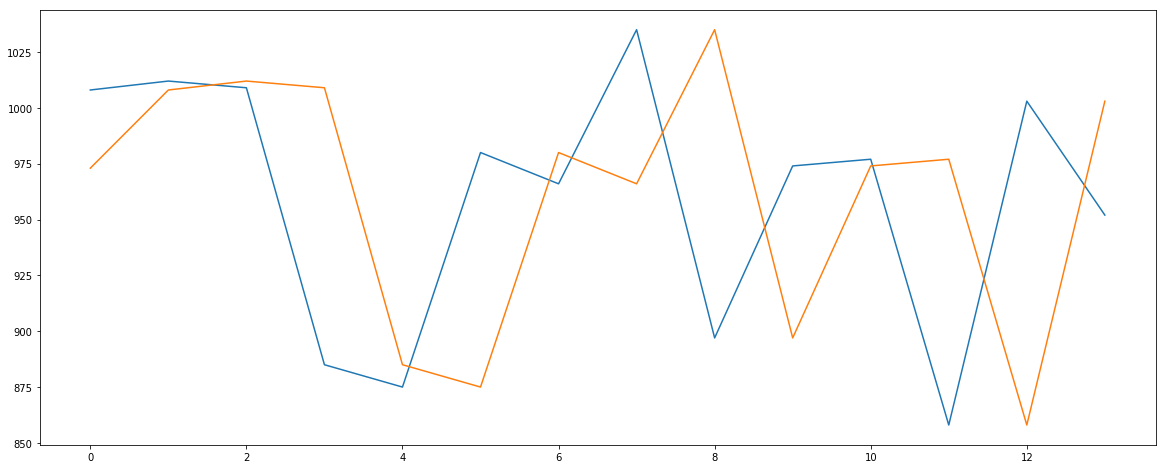

In [522]:
X = series.values
train, test = X[0:-14], X[-14:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,8])
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

Day=1, Predicted=971.333558, Expected=861.000000
Day=2, Predicted=920.033714, Expected=844.000000
Day=3, Predicted=880.618260, Expected=898.000000
Day=4, Predicted=908.706536, Expected=915.000000
Day=5, Predicted=917.857354, Expected=949.000000
Day=6, Predicted=931.965512, Expected=884.000000
Day=7, Predicted=912.599165, Expected=978.000000
Day=8, Predicted=951.567148, Expected=1066.000000
Day=9, Predicted=995.705312, Expected=1053.000000
Day=10, Predicted=986.363332, Expected=916.000000
Day=11, Predicted=947.959042, Expected=926.000000
Day=12, Predicted=933.243590, Expected=902.000000
Day=13, Predicted=925.689871, Expected=975.000000
Day=14, Predicted=956.130742, Expected=943.000000
Day=15, Predicted=949.374017, Expected=876.000000
Day=16, Predicted=918.460698, Expected=1001.000000
Day=17, Predicted=981.248096, Expected=1031.000000
Day=18, Predicted=996.207606, Expected=917.000000
Day=19, Predicted=960.279532, Expected=909.000000
Day=20, Predicted=934.849088, Expected=912.000000
Day=2

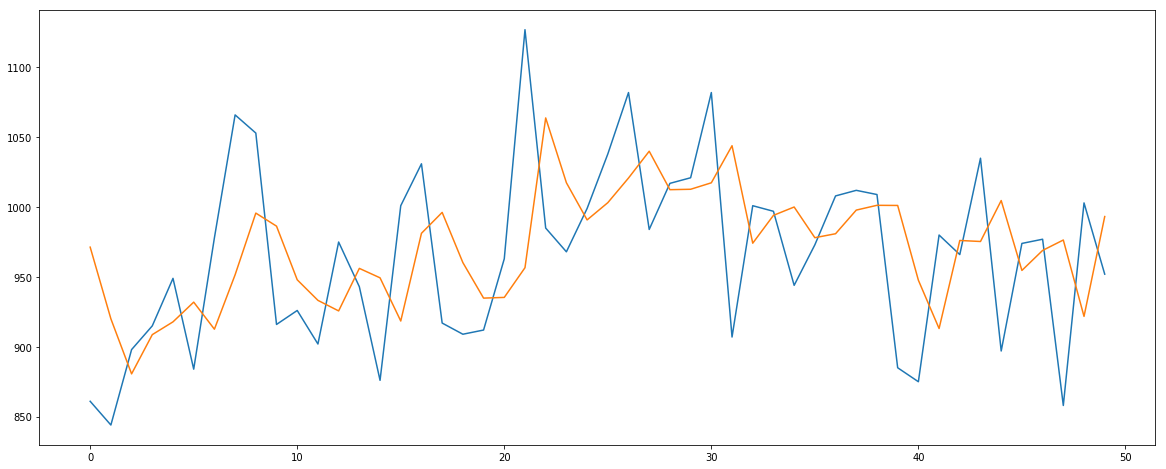

In [509]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problemc
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# # transform data to be stationary
# raw_values = series.values
# diff_values = difference(raw_values, 1)
 
# # transform data to be supervised learning
# supervised = timeseries_to_supervised(diff_values, 1)
# supervised_values = supervised.values
 
# # split data into train and test-sets
# train, test = supervised_values[0:-50], supervised_values[-50:]
 
# # transform the scale of the data
# scaler, train_scaled, test_scaled = scale(train, test)
 
# # fit the model
# lstm_model = fit_lstm(train_scaled, 1, 1500, 1)
# # forecast the entire training dataset to build up state for forecasting
# train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
# lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-50:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,8])
pyplot.plot(raw_values[-50:])
pyplot.plot(predictions)
pyplot.show()

In [518]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2015-12-31') & (df['date'] < '2018-01-25')
df = df.loc[mask1] 
df = df[['Crime Subcategory', 'date']]
dfg = df.groupby(['date']).count()
dfg['date']=dfg.index
dfw = dfg.resample('W').sum()
print(dfw.head())
dfw = dfw[1:]
dfw=dfw[:-2]
dfw
series = dfw['Crime Subcategory']

            Crime Subcategory
date                         
2016-01-03                413
2016-01-10                939
2016-01-17                939
2016-01-24               1074
2016-01-31               1029


/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


Test RMSE: 83.543


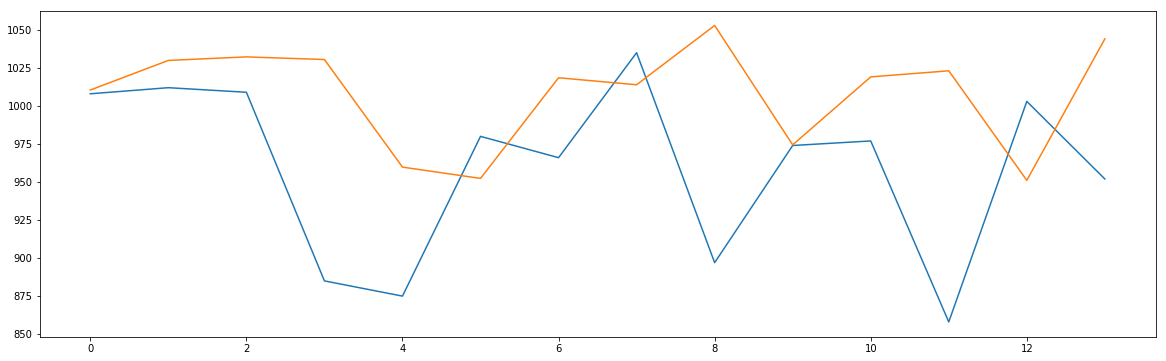

In [520]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# frame a sequence as a supervised learning problemc
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
144/144 [==============================] - 5s 36ms/step - loss: 0.2239
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1494
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1325
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1277
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1260
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1252
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1247
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1242
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1238
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1233
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1227
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1221
Epoch 1/1
144/144 [====================

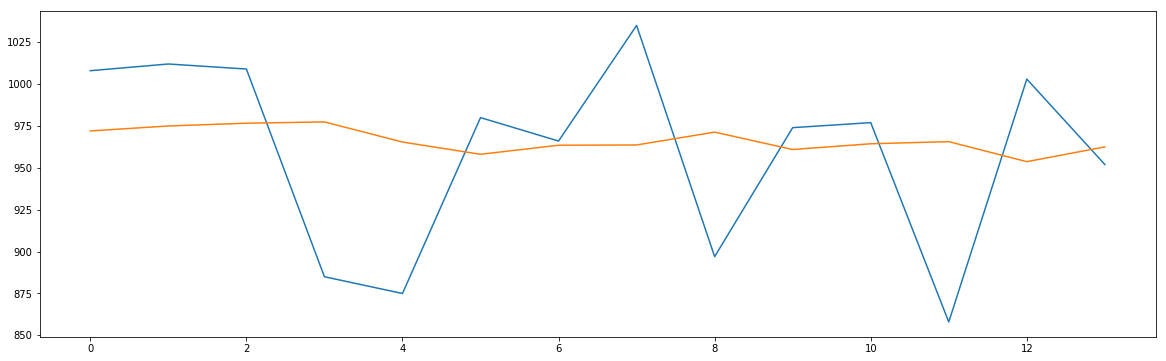

In [537]:
# Removing difference, changing epochs from 1500 to 100 to match shuffled_lstm runs

# frame a sequence as a supervised learning problemc
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return Series(diff)
 
# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
# diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
# supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 100, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
# 	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
144/144 [==============================] - 6s 42ms/step - loss: 0.1441
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1377
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1348
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1335
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1328
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1324
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1322
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1320
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1318
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1317
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1316
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1315
Epoch 1/1
144/144 [====================

144/144 [==============================] - 1s 4ms/step - loss: 0.1270
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1269
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1268
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1267
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1266
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1265
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1263
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1262
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1261
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1260
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1259
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1258
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 5ms/step - loss: 0.1116
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1114
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1113
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1111
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1110
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1108
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1107
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1105
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1104
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1102
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1101
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1100
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1024
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================]

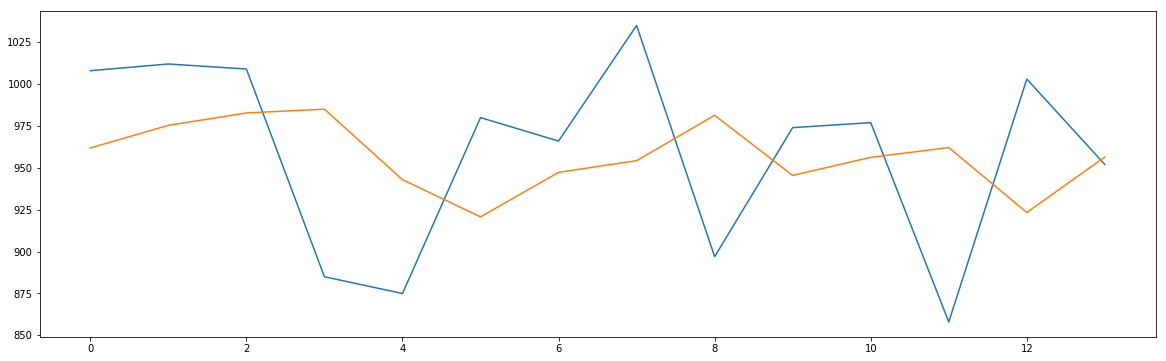

In [548]:
# Remove difference
# frame a sequence as a supervised learning problemc
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return Series(diff)
 
# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
# diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
# supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 400, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
# 	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
144/144 [==============================] - 7s 51ms/step - loss: 0.1686
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1455
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1452
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1456
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1456
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1454
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1450
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1447
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1443
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1439
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1435
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1431
Epoch 1/1
144/144 [====================

144/144 [==============================] - 1s 5ms/step - loss: 0.1289
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1288
Epoch 1/1
144/144 [==============================] - 1s 7ms/step - loss: 0.1287
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1286
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1285
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1283
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1282
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1280
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1278
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1276
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1274
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1271
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 5ms/step - loss: 0.1055
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1055
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1055
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1055
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1054
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1054
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1054
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1054
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1054
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1053
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1053
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1053
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1042
Epoch 1/1
144/144 [==============================]

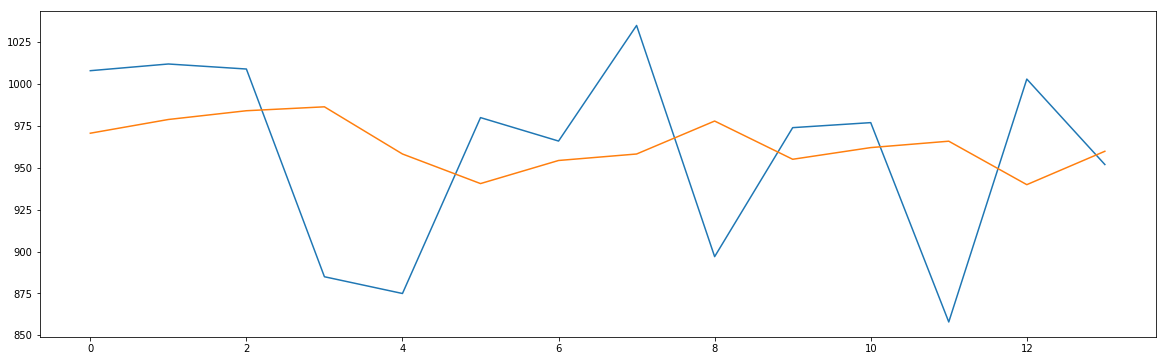

In [550]:
# Remove difference -- try RMSProp instead of adam
# frame a sequence as a supervised learning problemc
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='RMSprop')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
raw_values = series.values
# diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
# supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 400, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
# 	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

In [541]:
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [543]:
timeseries_to_supervised(raw_values,1)

,0,0
0,0.0,873
1,873.0,897
2,897.0,904
3,904.0,927
4,927.0,807
5,807.0,912
6,912.0,829
7,829.0,880
8,880.0,837
9,837.0,861


In [545]:
weather = pd.read_csv('1452977.csv')
weather['date'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)
mask1 = (weather['date'] > '2014-12-31') & (weather['date'] <'2018-01-25')
w = weather.loc[mask1] 
w = w[['date', 'HOURLYPrecip', 'HOURLYDRYBULBTEMPF']]
w['dateonly'] = w['date'].dt.date

#Replacing values with "s" in them with NA
#Replacing "Trace" precipitation with 0
replacements = {
   'HOURLYDRYBULBTEMPF': {
      r'(.*s)': np.NaN,
      r'(\*)': np.NaN}
}
w.replace(replacements, regex=True, inplace=True)

replacements = {
   'HOURLYPrecip': {
      r'(.*s)': np.NaN,
    r'T': 0.00}
}
w.replace(replacements, regex=True, inplace=True)
w['temp'] = [float(x) for x in w['HOURLYDRYBULBTEMPF']]
w['prec'] = [float(x) for x in w['HOURLYPrecip']]
# wgroup = w.groupby('dateonly')['prec'].mean()
# wgroup = w.groupby('dateonly')['temp'].mean()
wgroup = w.groupby('dateonly')['prec','temp'].mean()
dfplus = dfw.join(wgroup)
dfplus.interpolate(inplace=True)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,20,23,25,26,27,28,29,33,34,44,45,46,47,72,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/dateutil/parser/__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


In [546]:
dfplus

,Crime Subcategory,prec,temp
date,,,
2015-01-11,873,0.002222,49.216216
2015-01-18,897,0.009600,52.100000
2015-01-25,904,0.000417,55.793103
2015-02-01,927,0.001600,47.457143
2015-02-08,807,0.006250,54.750000
2015-02-15,912,0.000000,48.115385
2015-02-22,829,0.000000,44.760000
2015-03-01,880,0.000000,46.653846
2015-03-08,837,0.000000,50.960000


Epoch 1/1
144/144 [==============================] - 7s 45ms/step - loss: 0.1430
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1385
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1384
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1381
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1377
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1372
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1367
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1362
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1358
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1354
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1351
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1347
Epoch 1/1
144/144 [====================

144/144 [==============================] - 1s 5ms/step - loss: 0.1191
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1189
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1187
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1185
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1183
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1181
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1179
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1177
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1175
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1173
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1171
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1169
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 0s 3ms/step - loss: 0.1033
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1033
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1031
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1032
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1031
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1031
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1030
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1030
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1029
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1029
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 8ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 7ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 6ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1021
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 5ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - ETA: 0s - loss: 0.101 - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1023
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1022
Epoch 1/1
144/144 [=======

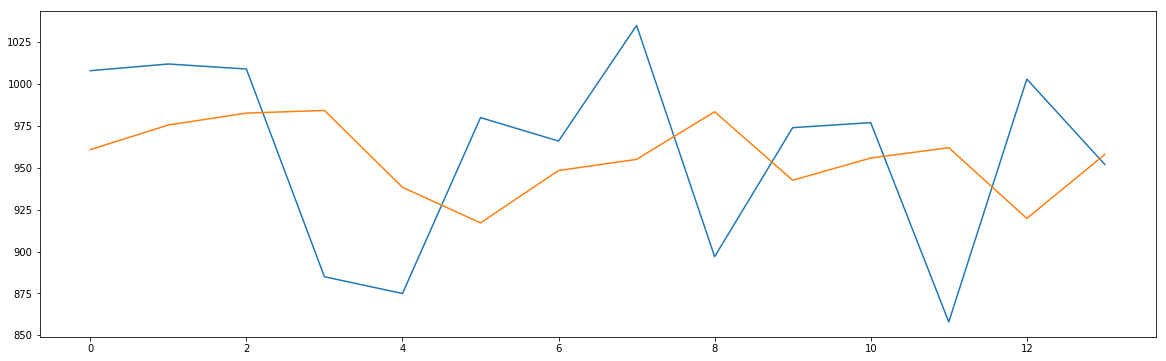

In [547]:
# Multi - value
#Removing difference, changing epochs from 1500 to 100 to match shuffled_lstm runs

# frame a sequence as a supervised learning problemc
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
data = dfplus
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
# supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1500, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

Epoch 1/1
144/144 [==============================] - 6s 43ms/step - loss: 0.1442
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1414
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1408
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1403
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1396
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1391A: 0s - loss: 0.140
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1385
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1380
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1375
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1371
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1367
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1363
Epoch 1/1
144/144 [=

144/144 [==============================] - 1s 4ms/step - loss: 0.1291
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1290
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1289
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1289
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1288
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1287
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1286
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1285
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1284
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1283
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1282
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1281
Epoch 1/1
144/144 [==============================]

144/144 [==============================] - 1s 4ms/step - loss: 0.1115
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1113
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1111
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1110
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1108
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1106
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1105
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1103
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1101
Epoch 1/1
144/144 [==============================] - 1s 5ms/step - loss: 0.1100
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1098
Epoch 1/1
144/144 [==============================] - 1s 4ms/step - loss: 0.1096
Epoch 1/1
144/144 [==============================]

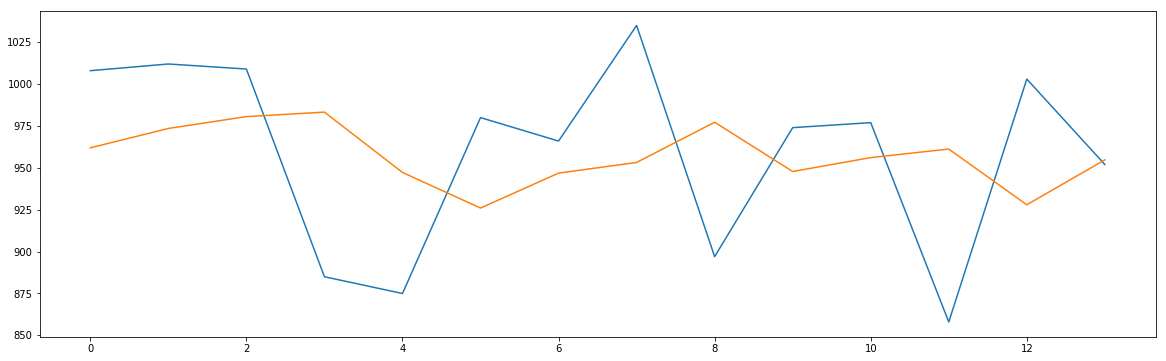

In [549]:
# Multi - value
#Removing difference, changing epochs from 1500 to 100 to match shuffled_lstm runs

# frame a sequence as a supervised learning problemc
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# transform data to be stationary
data = dfplus
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(raw_values, 1)
# supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-14], supervised_values[-14:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 300, 1)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
#walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i]
	print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-14:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
plt.figure(figsize=[20,6])
pyplot.plot(raw_values[-14:])
pyplot.plot(predictions)
pyplot.show()

## Multi-step

t+1 RMSE: 23.695991
t+2 RMSE: 32.049961
t+3 RMSE: 32.422215


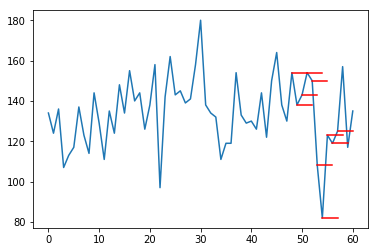

In [333]:
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	raw_values = raw_values.reshape(len(raw_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(raw_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return train, test

# make a persistence forecast
def persistence(last_ob, n_seq):
	return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()


# configure
n_lag = 1
n_seq = 3
n_test = 10
# prepare data
train, test = prepare_data(series, n_test, n_lag, n_seq)
# make forecasts
forecasts = make_forecasts(train, test, n_lag, n_seq)
# evaluate forecasts
evaluate_forecasts(test, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
47/47 [==============================] - 3s 58ms/step - loss: 0.1783
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1676
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1642
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1615
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1594
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1578
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1566
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1557
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1550
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1544
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1540
Epoch 1/1
47/47 [==============================] - 0s 3ms/step 

47/47 [==============================] - 0s 3ms/step - loss: 0.1477
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1465
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1376
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1392
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1394
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1391
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1443
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1462
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1372
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1358
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1357
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1340
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1354
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1339
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1352
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1339
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1350
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1337
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1331
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1331
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1322
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1321
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1315
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 5ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 5ms/step - loss: 0.1298
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1305
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1305
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1306
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1317
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1317
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1318
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

47/47 [==============================] - 0s 4ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 5ms/step - loss: 0.1342A: 0s - loss: 0.16
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1342
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1341
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1341
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1341
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1341
Epoch 1/1
47/47 [==============================] - 0s 4ms/step - loss: 0.1341
Epoch 1/1
47/47 [==============================] - 0s 3m

47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1333
Epoch 1/1
47/47 [==============================] - 0s 3ms/step - loss: 0.1

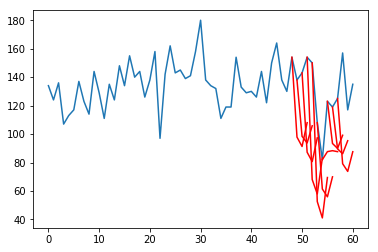

In [335]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

# configure
n_lag = 1
n_seq = 3
n_test = 10
n_epochs = 1500
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
56/56 [==============================] - 3s 48ms/step - loss: 0.1828
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1772
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1746
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1730
Epoch 1/1
56/56 [==============================] - ETA: 0s - loss: 0.163 - 0s 4ms/step - loss: 0.1719
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1711
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1705
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1700
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1691
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1689
Epoch 1/1
56/56 [======================

56/56 [==============================] - 0s 3ms/step - loss: 0.1618
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1616
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1615
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1614
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1613
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1612
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1611
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1609
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1608
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1607
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1606
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1604
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1495
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1495
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1494
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1494
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1493
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1493
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1492
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1491
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1491
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1490
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1462
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1462
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1462
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1461
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1455
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1455
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1455
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1455
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1455
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1452
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1454
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 5ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 3ms/step - loss: 0.1446
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1487
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1446
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1500
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1447
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1510
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1448
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1510
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1450
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1492
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1452
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1480
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1

56/56 [==============================] - 0s 4ms/step - loss: 0.1498
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1459
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1507
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1467
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1484
Epoch 1/1
56/56 [==============================] - 0s 3ms/step - loss: 0.1474
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.1475
Epoch 1/1
56/56 [==============================] - 1s 10ms/step - loss: 0.1478
Epoch 1/1
56/56 [==============================] - 0s 7ms/step - loss: 0.1483
Epoch 1/1
56/56 [==============================] - 0s 6ms/step - loss: 0.1470
Epoch 1/1
56/56 [==============================] - 0s 6ms/step - loss: 0.1482
Epoch 1/1
56/56 [==============================] - 0s 6ms/step - loss: 0.1473
Epoch 1/1
56/56 [==============================] - 0s 4ms/step - loss: 0.

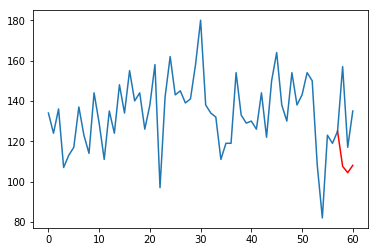

In [336]:
n_lag = 1
n_seq = 3
n_test = 1
n_epochs = 1500
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [352]:
raw_values = series.values
# transform data to be stationary
diff_series = difference(raw_values, 1)
# diff_values = diff_series.values
# diff_values = diff_values.reshape(len(diff_values), 1)
# # rescale values to -1, 1
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaled_values = scaler.fit_transform(diff_values)
# scaled_values = scaled_values.reshape(len(scaled_values), 1)
# # transform into supervised learning problem X, y
# supervised = series_to_supervised(scaled_values, n_lag, n_seq)
# supervised_values = supervised.values
# # split into train and test sets
# train, test = supervised_values[0:-n_test], supervised_values[-n_test:]

In [353]:
diff_series


0    -10
1     12
2    -29
3      6
4      4
5     20
6    -14
7     -9
8     30
9    -15
10   -18
11    24
12   -11
13    24
14   -14
15    21
16   -15
17     4
18   -18
19    12
20    20
21   -61
22    45
23    20
24   -19
25     2
26    -6
27     2
28    17
29    22
30   -42
31    -4
32    -2
33   -21
34     8
35     0
36    35
37   -21
38    -4
39     1
40    -4
41    18
42   -22
43    28
44    14
45   -26
46    -8
47    24
48   -16
49     5
50    11
51    -4
52   -42
53   -26
54    41
55    -4
56     6
57    32
58   -40
59    18
dtype: int64

In [516]:

n_vars = 1 if type(data) is list else data.shape[1]
df = DataFrame(data)
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
agg = concat(cols, axis=1)
agg.columns = names
# drop rows with NaN values
if dropnan:
    agg.dropna(inplace=True)
return agg

ValueError: Must pass 2-d input

In [367]:
supervised = series_to_supervised(raw_values, 1, 7)

In [370]:
supervised_values = supervised.values
train, test = supervised_values[0:-1], supervised_values[-1:]

In [372]:
test

array([[108.,  82., 123., 119., 125., 157., 117., 135.]])

In [375]:
forecasts = make_forecasts(train, test, 1, 7)

In [376]:
evaluate_forecasts(test, forecasts, 1, 7)

t+1 RMSE: 26.000000
t+2 RMSE: 15.000000
t+3 RMSE: 11.000000
t+4 RMSE: 17.000000
t+5 RMSE: 49.000000
t+6 RMSE: 9.000000
t+7 RMSE: 27.000000


In [377]:
forecasts

[[108.0, 108.0, 108.0, 108.0, 108.0, 108.0, 108.0]]

In [378]:
test

array([[108.,  82., 123., 119., 125., 157., 117., 135.]])

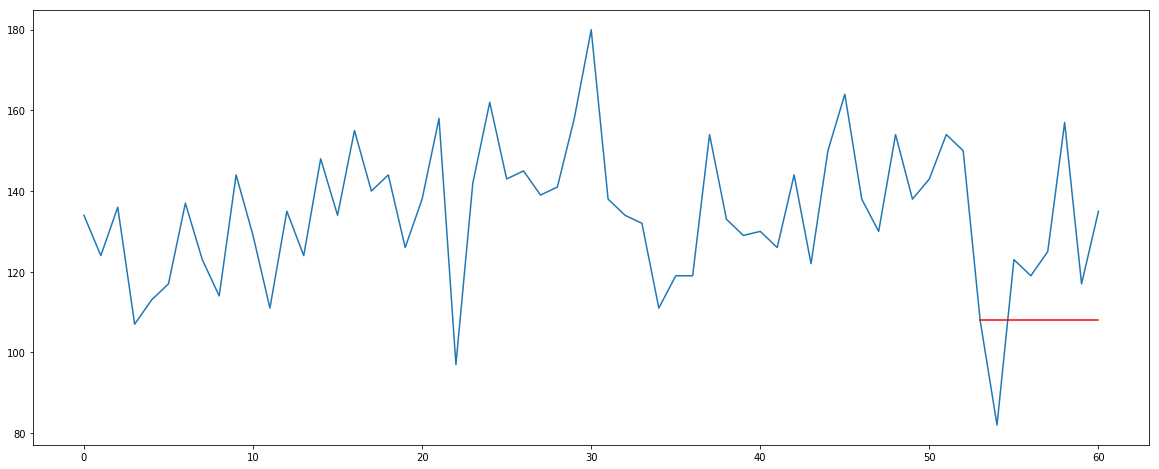

In [391]:
plt.figure(figsize=[20,8]) 
plot_forecasts(series, forecasts, 7)

In [390]:
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - 7 + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()

In [401]:
n_test = 1
n_lag = 1
n_seq = 7
raw_values = series.values
# transform data to be stationary
diff_series = difference(raw_values, 1)
diff_values = diff_series.values
diff_values = diff_values.reshape(len(diff_values), 1)
# rescale values to -1, 1
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_values = scaler.fit_transform(diff_values)
scaled_values = scaled_values.reshape(len(scaled_values), 1)
# transform into supervised learning problem X, y
supervised = series_to_supervised(scaled_values, n_lag, n_seq)
supervised_values = supervised.values
# split into train and test sets
train, test = supervised_values[0:-n_test], supervised_values[-n_test:]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [404]:
fit_lstm(train, 1, 7, 1, 1500, 1)

Epoch 1/1
52/52 [==============================] - 3s 57ms/step - loss: 0.1777
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1745
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1723
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1708
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1689
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1683
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1678
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1674
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1672
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1669
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1668
Epoch 1/1
52/52 [==============================] - 0s 3ms/step 

52/52 [==============================] - 0s 3ms/step - loss: 0.1641
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1641
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1640
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1640
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1640
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1639
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1639
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1639
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1638
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1638
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1638
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1637
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1602
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1602
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1601
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1601
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1601
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1601
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1600
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1600
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1600
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1600
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1599
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1599
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1585
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1585
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1584
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 6ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 5ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1579
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1578
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1578
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1575
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1576
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 8ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 4ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 1/1
52/52 [==============================] - 0s 3ms/step - loss: 0.1

In [419]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
	# extract raw values
	raw_values = series.values
	# transform data to be stationary
	diff_series = difference(raw_values, 1)
	diff_values = diff_series.values
	diff_values = diff_values.reshape(len(diff_values), 1)
	# rescale values to -1, 1
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaled_values = scaler.fit_transform(diff_values)
	scaled_values = scaled_values.reshape(len(scaled_values), 1)
	# transform into supervised learning problem X, y
	supervised = series_to_supervised(scaled_values, n_lag, n_seq)
	supervised_values = supervised.values
	# split into train and test sets
	train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
	return scaler, train, test

# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
	# reshape training into [samples, timesteps, features]
	X, y = train[:, 0:n_lag], train[:, n_lag:]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	# design network
	model = Sequential()
	model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(y.shape[1]))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit network
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
		model.reset_states()
	return model

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
	# invert first forecast
	inverted = list()
	inverted.append(forecast[0] + last_ob)
	# propagate difference forecast using inverted first value
	for i in range(1, len(forecast)):
		inverted.append(forecast[i] + inverted[i-1])
	return inverted

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
	inverted = list()
	for i in range(len(forecasts)):
		# create array from forecast
		forecast = array(forecasts[i])
		forecast = forecast.reshape(1, len(forecast))
		# invert scaling
		inv_scale = scaler.inverse_transform(forecast)
		inv_scale = inv_scale[0, :]
		# invert differencing
		index = len(series) - n_test + i - 1
		last_ob = series.values[index]
		inv_diff = inverse_difference(last_ob, inv_scale)
		# store
		inverted.append(inv_diff)
	return inverted

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = [row[i] for row in test]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	pyplot.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	pyplot.show()


# # configure
# n_lag = 1
# n_seq = 7
# n_test = 1
# n_epochs = 1500
# n_batch = 1
# n_neurons = 1
# # prepare data
# scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
#model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# # make forecasts
#forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# # inverse transform forecasts and test
#forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
# actual = [row[n_lag:] for row in test]
# actual = inverse_transform(series, actual, scaler, n_test+2)
# # evaluate forecasts
#evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# # plot forecasts
plot_forecasts(series, forecasts, n_test+2)


t+1 RMSE: 43.583876
t+2 RMSE: 4.422738
t+3 RMSE: 5.776252
t+4 RMSE: 2.789738
t+5 RMSE: 27.484914
t+6 RMSE: 11.913836
t+7 RMSE: 11.533601


In [418]:
actual

[[99.0, 140.0, 136.0, 142.0, 174.0, 134.0, 152.0]]

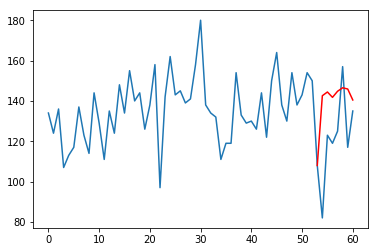

In [426]:
# plot the entire dataset in blue
pyplot.plot(series.values)
# plot the forecasts in red
for i in range(len(forecasts)):
    off_s = len(series) - 7 + i - 1
    off_e = off_s + len(forecasts[i]) + 1
    xaxis = [x for x in range(off_s, off_e)]
    yaxis = [series.values[off_s]] + forecasts[i]
    pyplot.plot(xaxis, yaxis, color='red')
# show the plot
pyplot.show()

## Time Lag